# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**
В нашем распоряжении есть данные о различных объектах недвижимости в Санкт-Петербурге и соседних населённых пунктах за 2014 - 2019 гг., предоставленные сервисом Яндекс.Недвижимость. Данные включают в себя множество параметров (общая площадь объекта, площадь кухни, этаж, кол-во комнат, наличие балкона и т.д.) об объектах, выставленных на продажу, а также их цена, дата, когда было опубликовано объявление, кол-во фотографий каждого объекта, место, где находится объект для продажи.


**План работы**
* Изучить общую информацию об имеющихся данных;
* Сделать предобработку данных (найти и изучить пропущенные данные, заполнить пропуски, где это возможно, удалить явные и неявные дубликаты, устранить редкие и выбивающиеся значения);
* Добавить в таблицу новые столбцы с необходимыми для проведения анализа ключевыми данными;
* Провести исследовательский анализ данных (изучить параметры данных, объектов, посмотреть, какие данные влияют на финальную цену объекта); 
* Написать общий вывод;

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    forsen = pd.read_csv('C:/Users/Games/Downloads/real_estate_data.csv', sep='\t')
except:
    forsen = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

forsen.info()
display(forsen.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведя общую информацию о данных с помощью команды .info() мы видим, что всего строк в датасете 23699.
Пропуски находятся в следующих столбцах данных:
* высота потолка
* кол-во этажей
* жилая площадь
* апартаменты это или нет
* площадь кухни
* число балконов
* название населённого пункта
* расстояние до ближайшего аэропорта
* расстояние до ближайшего парка
* расстояние до ближайшего пруда
* расстояние до центра города
* сколько дней было размещено объявление

В датасете мы также видим неправильный тип данных в столбце с датами first_day_exposition, где сейчас данные в формате object, а должны быть в datetime. Позже мы это исправим. Также в столбце locality_name          

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

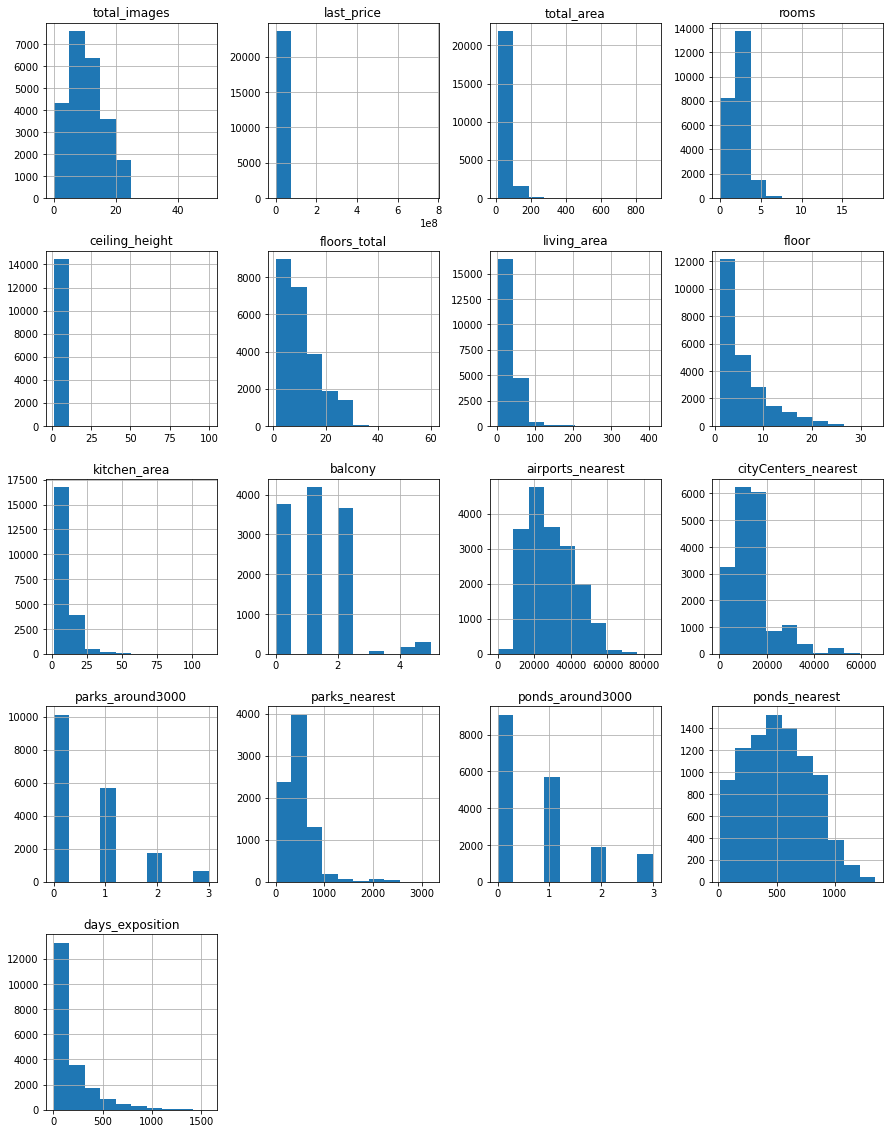

In [2]:
forsen.hist(figsize=(15,20))

Получилось 17 гистограмм, что равняется значению числовых столбцов датасета.

In [3]:
forsen['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В столбце locality_name с данными о расположении объектов имеются дубликаты, такие как село/посёлок с одинаковыми названиями, одинаковые названия с буквами е и ё и т.д. Впоследствии мы их исправим.

In [4]:
print(forsen.duplicated().sum())

0


Полностью повторяющихся строк в данных не обнаружено.

### Предобработка данных

Для начала найдем и изучим пропущенные значения в столбцах.
Пропуски находятся в следующих столбцах данных:
* высота потолка
* кол-во этажей
* жилая площадь
* апартаменты это или нет
* площадь кухни
* число балконов
* название населённого пункта
* расстояние до ближайшего аэропорта
* расстояние до ближайшего парка
* расстояние до ближайшего пруда
* расстояние до центра города
* сколько дней было размещено объявление

Наибольшее кол-во пропусков находится в след. данных об объектах недвижимости - апартаменты это или нет, кол-во балконов, расстояние до ближайшего парка и расстояние до ближайшего пруда. В этих столбцах пропущено более 10000 строк.

**Заполним пропуски там, где это возможно.**


In [5]:
print(forsen['balcony'].value_counts())
print(len(forsen[forsen['balcony'].isna()])) 
forsen['balcony'] = forsen['balcony'].fillna(0)
print(len(forsen[forsen['balcony'].isna()])) 

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64
11519
0


Выше в столбце с данными о балконах мы выявили пропуски NaN и заполнили их значением 0, т.к. если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [6]:
forsen['parks_around3000'] = forsen['parks_around3000'].fillna(0)
forsen['ponds_around3000'] = forsen['ponds_around3000'].fillna(0)

Пропуски в данных с кол-м ближайших парков и прудов заполним аналогично пропускам кол-ва балконов, т.к. если их не указали, то, скорее всего, их рядом нет.

In [7]:
forsen['ceiling_height'] = forsen['ceiling_height'].fillna(forsen['ceiling_height'].median())
living_area_spaces = (forsen['living_area']/forsen['total_area']).median()
forsen['living_area'] = forsen['living_area'].fillna(living_area_spaces*forsen['total_area'])
kitchen_area_spaces = (forsen['kitchen_area']/forsen['total_area']).median()
forsen['kitchen_area'] = forsen['kitchen_area'].fillna(kitchen_area_spaces*forsen['total_area'])
forsen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Пропуски в площади кухни и жилой площади мы заполнили медианным соотношением площади кухни / жилой площади к общей площади.**
Пропуски в столбцах с данными о кол-ве этажей в доме, на котором находится объект, названию населенного пункта, дней с момента публикации до снятия объявления, расстояния до ближайшего аэропорта, расстояния до центра города, расстояния до парка и  расстояния до пруда мы не трогали, т.к. не думаю, что заменить эти значения на медианные или какие-то другие было бы логично, т.к. это довольно важные параметры при выборе недвижимости. Мы оставили в этих строках NaN. Это не помешает нам проводить вычислительные операции.
Пропуски в вышеперечисленных столбцах с информацией могли появиться в результате отсутствия той или иной информации (наличие рядом парков/прудов), намеренного пропуска в результате мошеннических действий (площадь кухни, всего объекта в целом) или же просто случайностью, забывчивостью заполнения данных.

Проверим, появились ли после преобразований объекты, в которых общая площадь стала меньше, чем сумма площадей кухни и жилплощади.

In [8]:
display(forsen.query('total_area < (living_area + kitchen_area)'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.200000,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,16.896552,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,NaN,...,4.674138,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,NaN,...,5.000000,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.280000,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.70,16.0,23.30,15,NaN,...,4.706897,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
22907,9,65000000.0,228.00,2016-06-02T00:00:00,4,2.65,5.0,200.00,2,NaN,...,39.310345,0.0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
23102,0,5800000.0,66.00,2017-06-09T00:00:00,5,2.65,5.0,55.50,1,NaN,...,11.379310,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.65,16.0,16.00,12,NaN,...,3.258621,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,115.0


In [9]:
display(forsen)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.289724,9,NaN,...,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,NaN,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.000000,4,NaN,...,8.500000,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.700000,1,NaN,...,9.775862,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,43.583247,12,NaN,...,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [10]:
forsen = forsen.query('total_area >= (living_area + kitchen_area)')
display(forsen)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.289724,9,NaN,...,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,NaN,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.000000,4,NaN,...,8.500000,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.700000,1,NaN,...,9.775862,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,43.583247,12,NaN,...,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


После заполнения пропусков появилось 116 строк с данными, где общая площадь меньше суммы площади кухни и жилой площади. Выбросим их из нашего датасета, т.к. в сравнении с кол-вом пропущенных значений в этих столбцах 64 девиантные строки ничтожны, как и в самой выборке. Преобразуем датасет учитывая новую информацию.

In [11]:
print(len(forsen[forsen['is_apartment'].isna()])) 
forsen['is_apartment'] = forsen['is_apartment'].fillna('неизвестно')
print(len(forsen[forsen['is_apartment'].isna()])) 
print(forsen['is_apartment'].value_counts())
forsen['is_apartment'] = forsen['is_apartment'].replace([False, True], ['Нет', 'Да'])
print(forsen['is_apartment'].value_counts())

20831
0
неизвестно    20831
False          2704
True             48
Name: is_apartment, dtype: int64
неизвестно    20831
Нет            2704
Да               48
Name: is_apartment, dtype: int64


В столбце с булевыми значениями является ли объект апартаментами или нет мы заменили пропущенные значения на "неизвестно", а также заменили имеющиеся булевы значения true/false на да/нет

In [12]:
forsen.info()
display(forsen.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23583 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23583 non-null  int64  
 1   last_price            23583 non-null  float64
 2   total_area            23583 non-null  float64
 3   first_day_exposition  23583 non-null  object 
 4   rooms                 23583 non-null  int64  
 5   ceiling_height        23583 non-null  float64
 6   floors_total          23497 non-null  float64
 7   living_area           23583 non-null  float64
 8   floor                 23583 non-null  int64  
 9   is_apartment          23583 non-null  object 
 10  studio                23583 non-null  bool   
 11  open_plan             23583 non-null  bool   
 12  kitchen_area          23583 non-null  float64
 13  balcony               23583 non-null  float64
 14  locality_name         23534 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,неизвестно,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,неизвестно,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,неизвестно,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.289724,9,неизвестно,...,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,неизвестно,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,неизвестно,...,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6,неизвестно,...,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.658769,22,неизвестно,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26,неизвестно,...,8.810000,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,неизвестно,...,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Командой info() мы проверили, были ли устранены те пропуски, которые мы хотели устранить. 
Ещё надо бы изменить тип данных в столбце first_day_exposition с object на datetime для корректного и более удобного отображения.

In [13]:
forsen['first_day_exposition'] = pd.to_datetime(forsen['first_day_exposition'],
                                                format='%Y-%m-%dT%H:%M:%S')
display(forsen.head())
forsen.info()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,неизвестно,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,неизвестно,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,неизвестно,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.289724,9,неизвестно,...,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,неизвестно,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23583 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23583 non-null  int64         
 1   last_price            23583 non-null  float64       
 2   total_area            23583 non-null  float64       
 3   first_day_exposition  23583 non-null  datetime64[ns]
 4   rooms                 23583 non-null  int64         
 5   ceiling_height        23583 non-null  float64       
 6   floors_total          23497 non-null  float64       
 7   living_area           23583 non-null  float64       
 8   floor                 23583 non-null  int64         
 9   is_apartment          23583 non-null  object        
 10  studio                23583 non-null  bool          
 11  open_plan             23583 non-null  bool          
 12  kitchen_area          23583 non-null  float64       
 13  balcony         

Преобразование столбца прошло успешно.

In [14]:
forsen['locality_name'] = forsen['locality_name'].str.replace('ё', 'е')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'поселок городского типа', 'городской поселок')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'коттеджный поселок', 'поселок')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'поселок', 'село')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'село', 'поселок')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'городской поселок', 'поселок')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'поселок при железнодорожной станции', 'поселок станции')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'садовое товарищество Рахья', 'поселок Рахья')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'деревня Зимитицы', 'поселок Зимитицы')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'деревня Калитино', 'поселок Калитино')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'садовое товарищество Новая Ропша', 'поселок Ропша')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'садовое товарищество Приладожский', 'поселок Приладожский')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'деревня Щеглово', 'поселок Щеглово')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'деревня Кудрово', 'Кудрово')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'деревня Рабитицы', 'поселок Рабитицы')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'деревня Гарболово', 'поселок Гарболово')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'поселок Любань', 'Любань')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'поселок станции Громово', 'поселок Громово')
forsen['locality_name'] = forsen['locality_name'].str.replace(
    'поселок Никольское', 'Никольское')
forsen['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский', 'поселок Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'поселок Аннино', 'поселок Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'поселок Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'деревн

Удалили неявные дубликаты путём переноса всего списка названий в ворд и функции ctrl + f и тщательного просмотра каждого наименования. Заменили букву ё на е, упростили все варианты написания поселков. 


In [15]:
forsen['ceiling_height'].value_counts()


2.65    9813
2.50    3508
2.60    1640
2.70    1567
3.00    1108
        ... 
3.76       1
4.90       1
5.20       1
2.89       1
4.65       1
Name: ceiling_height, Length: 181, dtype: int64

In [16]:
display(forsen.query('days_exposition.isna()'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,неизвестно,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.658769,22,неизвестно,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18,1,2.65,22.0,22.714396,3,неизвестно,...,6.896552,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02,2,2.65,9.0,30.300000,7,неизвестно,...,7.000000,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31,2,2.60,24.0,29.700000,9,неизвестно,...,8.300000,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.400000,17,неизвестно,...,15.600000,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.300000,5,неизвестно,...,5.600000,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,неизвестно,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,неизвестно,...,9.775862,0.0,поселок Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [17]:
display(forsen.query('days_exposition > 1000'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
109,2,7497600.0,62.5,2015-12-08,2,2.65,5.0,35.500000,5,неизвестно,...,9.5,0.0,Пушкин,14517.0,26670.0,1.0,517.0,0.0,NaN,1048.0
353,4,5990000.0,43.5,2015-05-08,1,3.00,5.0,25.000000,4,неизвестно,...,9.4,0.0,Санкт-Петербург,10527.0,10278.0,1.0,93.0,0.0,NaN,1292.0
398,7,12789000.0,79.3,2014-12-09,2,3.00,8.0,43.100000,5,Нет,...,17.6,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1345.0
437,12,3350000.0,37.0,2015-02-24,1,2.55,6.0,17.800000,6,неизвестно,...,8.4,0.0,Петергоф,46151.0,34044.0,1.0,185.0,1.0,755.0,1273.0
459,13,5200000.0,51.0,2016-03-02,2,2.55,9.0,32.000000,5,неизвестно,...,6.0,0.0,Санкт-Петербург,48522.0,16360.0,0.0,NaN,0.0,NaN,1153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,5,4900000.0,80.0,2014-12-25,3,2.65,15.0,47.000000,14,неизвестно,...,9.0,2.0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,1187.0
23318,6,5620020.0,82.3,2015-03-10,3,2.70,21.0,45.600000,12,неизвестно,...,15.7,0.0,Санкт-Петербург,21793.0,17121.0,0.0,NaN,1.0,31.0,1200.0
23389,6,2850000.0,40.0,2015-01-26,1,2.60,10.0,19.000000,8,Нет,...,9.0,2.0,поселок Бугры,NaN,NaN,0.0,NaN,0.0,NaN,1012.0
23426,17,8778000.0,47.5,2014-12-29,1,3.00,7.0,26.973345,4,неизвестно,...,11.7,2.0,Санкт-Петербург,39412.0,10186.0,1.0,1424.0,3.0,204.0,1360.0


In [18]:
forsen = forsen.query('ceiling_height < 6')
forsen = forsen.query('last_price > 1000000')

display(forsen)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,неизвестно,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,неизвестно,...,11.000000,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,неизвестно,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.289724,9,неизвестно,...,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,неизвестно,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,неизвестно,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,неизвестно,...,8.500000,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,неизвестно,...,9.775862,0.0,поселок Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.583247,12,неизвестно,...,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


В датасете находится 29 строк с высотой потолка выше 6 метров, хотя 5 метров считается уже выше нормы, поэтому все строки датасета с высотой потолков выше 6 метров мы отбросим из выборки. Также я считаю, что необходимо отбросить строки датасета с ценой ниже миллиона рублей, потому что это слишком низкая цена продажи квартиры, даже однокомнатной и с общим метражом ~30-40 м. Таких строк в датасете 225. Также было удалено 276 строк объявлений с кол-м дней с момента публикации до снятия 1000+, т.к. не думаю, что это объекты, стоявшие на рынке недвижимости около 3х лет и более релевантны.

In [19]:
forsen.info()
print(19919/23699)
print(23310/23699)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23310 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23310 non-null  int64         
 1   last_price            23310 non-null  float64       
 2   total_area            23310 non-null  float64       
 3   first_day_exposition  23310 non-null  datetime64[ns]
 4   rooms                 23310 non-null  int64         
 5   ceiling_height        23310 non-null  float64       
 6   floors_total          23224 non-null  float64       
 7   living_area           23310 non-null  float64       
 8   floor                 23310 non-null  int64         
 9   is_apartment          23310 non-null  object        
 10  studio                23310 non-null  bool          
 11  open_plan             23310 non-null  bool          
 12  kitchen_area          23310 non-null  float64       
 13  balcony         

In [20]:
display(forsen.duplicated().sum())


0

### Посчитаем и добавим в таблицу новые столбцы

In [21]:
forsen['one_square_price'] = forsen['last_price'] / forsen['total_area']
forsen['day_of_publishing'] = pd.DatetimeIndex(forsen['first_day_exposition']).weekday
forsen['month_of_publishing'] = pd.DatetimeIndex(forsen['first_day_exposition']).month
forsen['year_of_publishing'] = pd.DatetimeIndex(forsen['first_day_exposition']).year
display(forsen.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,day_of_publishing,month_of_publishing,year_of_publishing
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,неизвестно,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,неизвестно,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,неизвестно,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.289724,9,неизвестно,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,неизвестно,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,неизвестно,...,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,неизвестно,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.658769,22,неизвестно,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,неизвестно,...,NaN,0.0,NaN,0.0,NaN,189.0,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,неизвестно,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017


**Добавили в датасет 4 новых столбца:**
* Цена за м2
* День публикации объявления
* Месяц публикации объявления
* Год публикации объявления

Ниже напишем функцию для определения этажа (первый, последний, другой).

In [22]:
def floor_type(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor == floor_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'
forsen['floor_type'] = forsen.apply(floor_type, axis=1)
display(forsen.head(13))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,неизвестно,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,неизвестно,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,неизвестно,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.289724,9,неизвестно,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,неизвестно,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,неизвестно,...,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,неизвестно,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.658769,22,неизвестно,...,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,неизвестно,...,0.0,NaN,0.0,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,неизвестно,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой


Функция работает верно. Если этаж строки равен значению общего кол-ва этажей то в новом столбце он определяется как "последний", если этаж первый - то первый, если ни то, ни другое, то "другой".

In [23]:
forsen['distance_to_centre_km'] = (forsen['cityCenters_nearest'] / 1000).round()
display(forsen['cityCenters_nearest'].head())
display(forsen.head())

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type,distance_to_centre_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,неизвестно,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,неизвестно,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,неизвестно,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.289724,9,неизвестно,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,неизвестно,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


Добавили столбец с расстоянием до центра города в километрах, округлённый.

### Проведем исследовательский анализ данных

<AxesSubplot:>

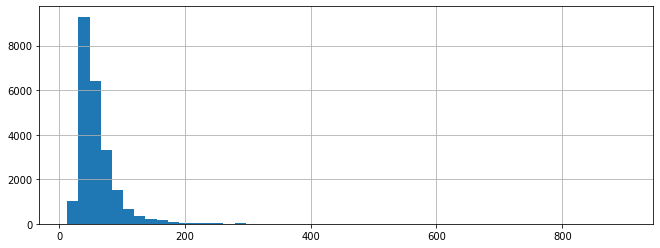

In [24]:
forsen['total_area'].hist(bins=50, figsize = (11,4))

Наибольшее распределение объявлений с общей площадью объекта находится на ~50 м2 (пик около 10 тыс. ед. + 6 тыс. ед.), около 4 тыс. объектов ~70 м2. 

<AxesSubplot:>

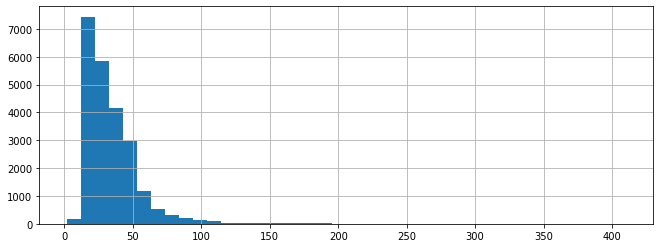

In [25]:
forsen['living_area'].hist(bins=40, figsize = (11,4))


Пик в 7+ тысяч объявлений с жилой площадью около 20 м2.

<AxesSubplot:>

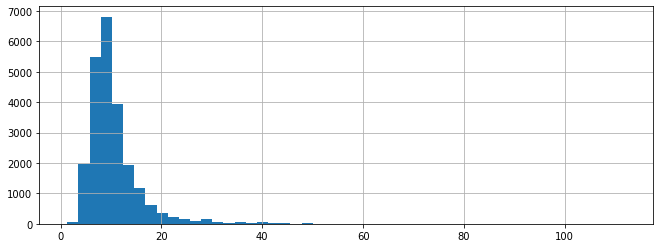

In [26]:
forsen['kitchen_area'].hist(bins=50, figsize = (11,4))


Пик почти в 7 тысяч объявлений с площадью кухни около 10 м2, слева ~5.5 тыс. объявлений с площадью кухни от 5 до 10 м2 и 2 тыс. 5 и меньше м2. Около 8 тыс. объявлений с площадью кухни более 10 м2 (10-20 м2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_square_price,day_of_publishing,month_of_publishing,year_of_publishing,floor_type,distance_to_centre_km,price_in_millions
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,неизвестно,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0,13.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,неизвестно,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0,3.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,неизвестно,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0,5.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.289724,9,неизвестно,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0,65.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,неизвестно,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0,10.0


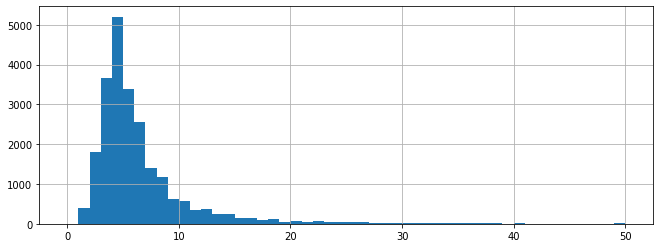

In [27]:
forsen['price_in_millions'] = (forsen['last_price'] / 1000000).round()
forsen['price_in_millions'].hist(bins=50, figsize = (11,4), range = (0,50))
display(forsen.head())

Самый дорогой объект - 76 300 000 руб. 
Для удобства я добавил новый столбец цены в миллионах.
Пик в 5 тыс. объявлений находится на отметке в ~4 млн. руб., чуть меньше медианного значения данного столбца данных. Основное кол-во объектов имеет ценовой диапазон от ~2,5 млн. руб. до ~6 млн. руб.


19

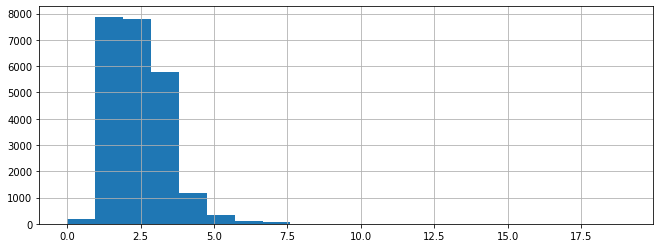

In [28]:
forsen['rooms'].hist(bins=20, figsize = (11,4))

forsen['rooms'].max()


Пик кол-ва комнат у объекта - 1-2 шт. 3 комнаты встречаются чуть реже. 4+ ещё реже. Есть объекты с 0 комнат - скорее всего, это студии.

<AxesSubplot:>

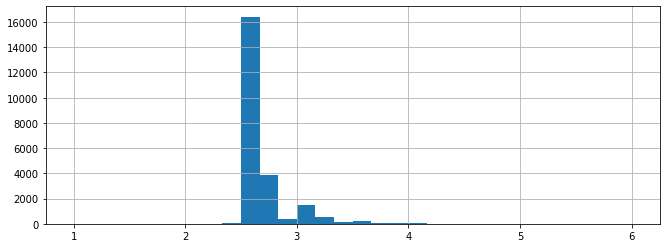

In [29]:
forsen['ceiling_height'].hist(bins=30, figsize = (11,4), range = (1, 6))

Пик в 16 тыс. объявлений находится на отметке высоты потолков ~2,5 м. Оч. редко встречаются объекты с потолками чуть ниже, около 4 тыс. с высотой от 2,5 до 3х м.

<AxesSubplot:>

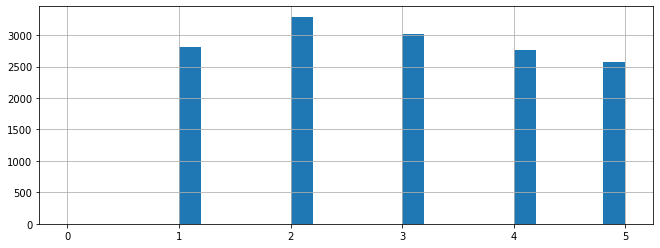

In [30]:
forsen['floor'].hist(bins=25, figsize = (11,4), range = (0,5))

<AxesSubplot:>

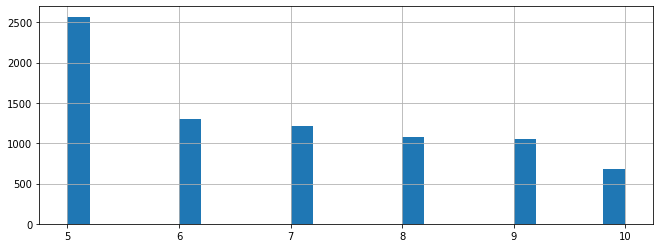

In [31]:
forsen['floor'].hist(bins=25, figsize = (11,4), range = (5,10))

<AxesSubplot:>

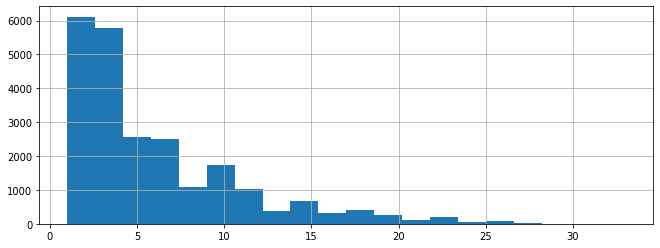

In [32]:
forsen['floor'].hist(bins=20, figsize = (11,4))

Основная масса объектов находится на 1-4м этажах - около 12 тыс. ед. (~2800 на 1-м, ~3200 на 2-м, ~3000 на 3-м, ~2700 на 4-м). ~2500 на 5 этаже, 1250 на 6-м, 1200 на 7-м, 1000 на 8-м, столько же на 9-м, около 650 на 10-м. Объектов начиная с 10 этажа и выше около 3500 ед.

<AxesSubplot:>

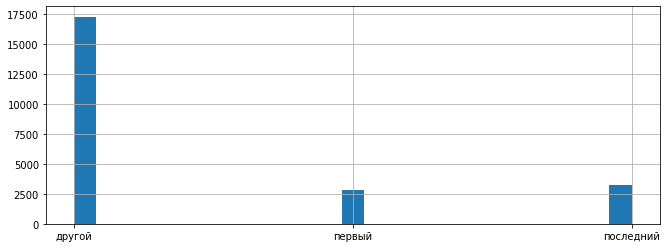

In [33]:
forsen['floor_type'].hist(bins=25, figsize = (11,4))

Всего объектов на первом этаже чуть меньше 3-х тысяч, на последнем чуть больше 3,5 тыс. Остальные объекты не находятся ни на 1 ни на последнем этажах.

<AxesSubplot:>

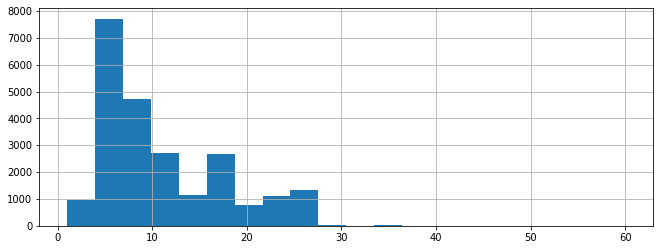

In [34]:
forsen['floors_total'].hist(bins=20, figsize = (11,4))

<AxesSubplot:>

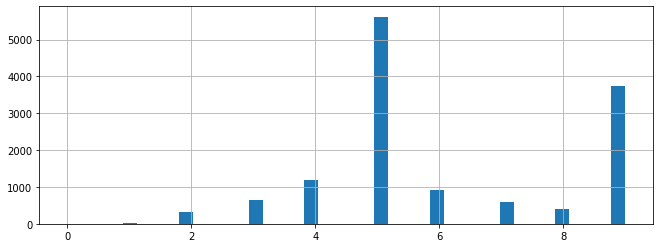

In [35]:
forsen['floors_total'].hist(bins=40, figsize = (11,4), range = (0,9))

Пик объектов почти в 6 тыс. находятся в пятиэтажках. 

<AxesSubplot:>

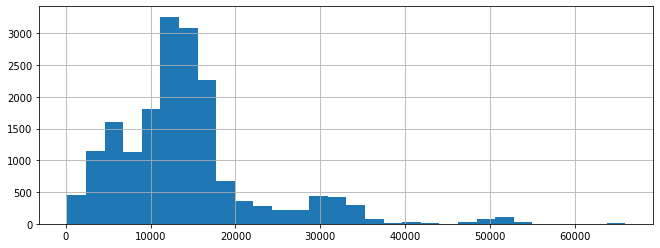

In [36]:
forsen['cityCenters_nearest'].hist(bins=30, figsize = (11,4))

<AxesSubplot:>

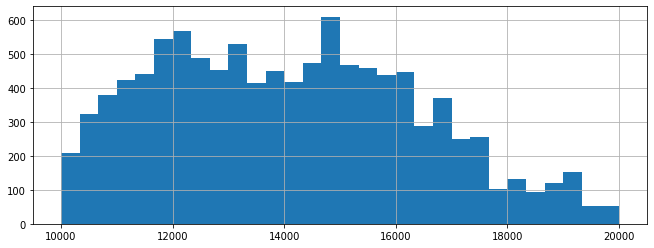

In [37]:
forsen['cityCenters_nearest'].hist(bins=30, figsize = (11,4), range = (10000, 20000))

Пик находится примерно на отметке от 11,5 тыс. м. до 15. тыс. м. Меньше всего в выборке объявлений, которые находятся дальше, остальные на расстоянии ближе 10 тыс. м.

<AxesSubplot:>

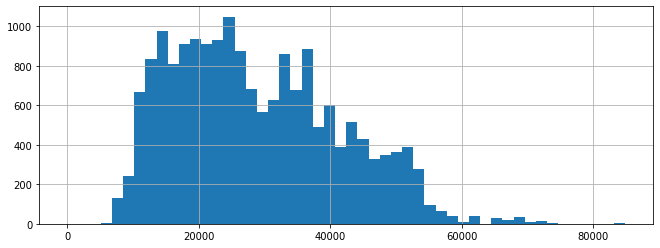

In [38]:
forsen['airports_nearest'].hist(bins=50, figsize = (11,4))

В выборке находится информация о расстоянии до аэропорта по 17901 объекту из 23699. 
Основная масса объектов находится на расстоянии от 10 тыс. м. до 30 тыс. м.
На расстоянии до 10 тыс. м. объектов практически нет.


<AxesSubplot:>

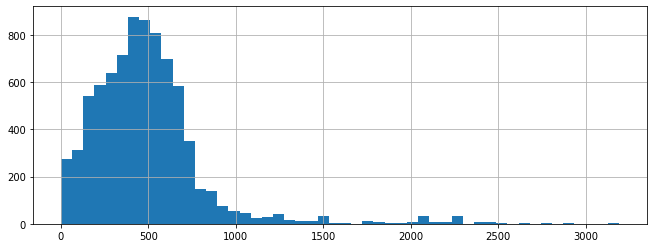

In [39]:
forsen['parks_nearest'].hist(bins=50, figsize = (11,4))

В выборке находится информация о расстоянии до парка всего по 7949 объекту из 23699. Из этих 8 тысяч пик приходится на 500 метров, подавляющее большинство находится на расстоянии меньше, остальные дальше.

<AxesSubplot:>

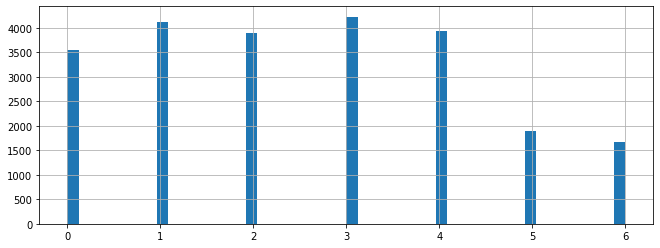

In [40]:
forsen['day_of_publishing'].hist(bins=50, figsize = (11,4))

Все объявления были размещены равномерно в будние дни, почти в два раза реже размещение проходило в субботу/воскресенье.

<AxesSubplot:>

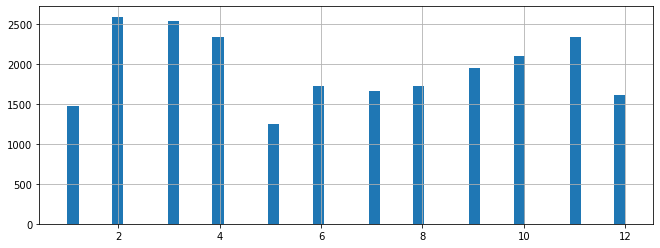

In [41]:
forsen['month_of_publishing'].hist(bins=50, figsize = (11,4))

Если смотреть помесячно, то наименьшее кол-во объявлений было размещено в мае, январе и декабре. Больше всего в феврале и марте, затем идут апрель и ноябрь. В каждый из летних месяцев размещений почти также мало как и в декабре.

<AxesSubplot:>

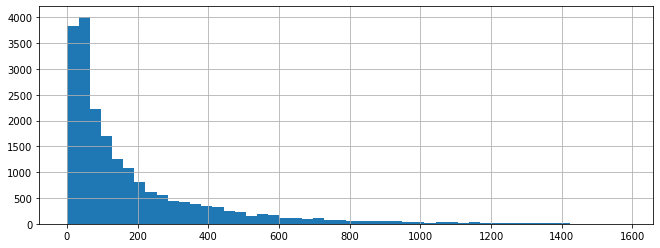

In [42]:
forsen['days_exposition'].hist(bins=50, figsize = (11,4))

In [43]:
print(forsen['days_exposition'].describe())


count    20197.000000
mean       181.338516
std        220.341709
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


Исходя из данных о нижнем (25%) и верхнем (75%) квартилях, быстрыми продажами можно считать те, которые были сделаны за ~45 дней, а долгими за ~232 дня.

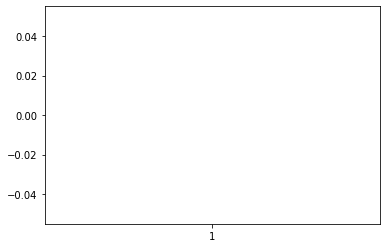

In [44]:
plt.boxplot(forsen['days_exposition'])
plt.show()

<AxesSubplot:>

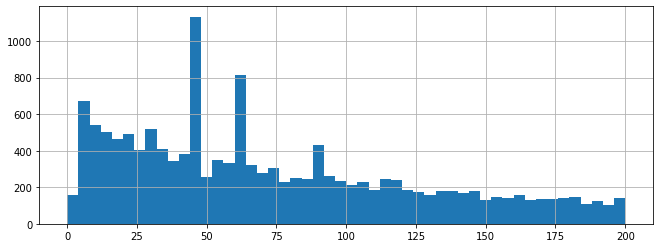

In [45]:
forsen['days_exposition'].hist(bins=50, figsize = (11,4), range = (0,200))

In [46]:
print(forsen['days_exposition'].median())
print(forsen['days_exposition'].mean())

96.0
181.33851562113185


Напомню, что я убрал из выборки объявления, которые продавались дольше 1000 дней. По этой причине среднее получилось немного меньше, чем если бы считали от изначальных данных.
Обычно продажа занимает около 100 дней (пик значений в ~3500 ед.). Затем около 9 тыс. объявлений были проданы в период от 1 дня до трех месяцев. Если предположить, что даже продажи сделанные за 1 день достоверны и не связаны с мошенническими дейсвтиями, то быстрыми можно считать продажи, сделанные в период от дня до 2-х месяцев, по моему мнению. Аномально долгими я посчитал значения, которые ранее отбросил, т.е. 1000+ дней. Хотя, наверное, можно считать что все объявления, которые не продаются через 4-5 месяцев, долгими. К примеру, статистика, предоставленная Сбербанком за 2020-й год говорит, что среднее время продажи недвижимости = 79 дней, а 90% объектов продаются после 3-х месяцев.  

In [47]:
forsen.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,day_of_publishing,month_of_publishing,year_of_publishing,distance_to_centre_km,price_in_millions
total_images,1.000000,0.103127,0.113092,0.097709,0.053024,0.008351,0.100473,0.031196,-0.028642,-0.023440,...,-0.009762,0.009551,-0.003550,-0.026748,0.131555,-0.009652,0.005655,0.139846,-0.047108,0.102968
last_price,0.103127,1.000000,0.652980,0.361666,0.291480,-0.011352,0.582990,0.023682,-0.024503,-0.007891,...,-0.015527,0.206667,-0.084418,0.081368,0.737607,0.003580,0.001574,-0.042082,-0.206866,0.999639
total_area,0.113092,0.652980,1.000000,0.758230,0.397592,-0.080357,0.947211,-0.027413,-0.069808,-0.032086,...,-0.022436,0.198046,-0.097886,0.149820,0.297838,-0.002949,0.004213,-0.079566,-0.231517,0.652993
rooms,0.097709,0.361666,0.758230,1.000000,0.249004,-0.232096,0.829267,-0.152735,-0.141603,-0.083018,...,-0.055164,0.120689,-0.057272,0.126971,0.049008,-0.003002,-0.005557,-0.055027,-0.185322,0.361749
ceiling_height,0.053024,0.291480,0.397592,0.249004,1.000000,-0.087748,0.379531,-0.047276,0.003664,-0.000949,...,-0.057605,0.213591,-0.107619,0.113866,0.290823,-0.020797,-0.002364,-0.053741,-0.298029,0.291730
floors_total,0.008351,-0.011352,-0.080357,-0.232096,-0.087748,1.000000,-0.164647,0.675773,0.067757,0.043861,...,0.097709,-0.055923,0.039306,-0.054161,0.136416,0.014130,0.016049,0.011388,0.018602,-0.011326
living_area,0.100473,0.582990,0.947211,0.829267,0.379531,-0.164647,1.000000,-0.092475,-0.056337,-0.023674,...,-0.049415,0.181785,-0.083970,0.144814,0.225386,-0.002331,-0.001285,-0.071880,-0.229262,0.583059
floor,0.031196,0.023682,-0.027413,-0.152735,-0.047276,0.675773,-0.092475,1.000000,0.038991,0.028680,...,0.072576,-0.034277,0.025835,-0.040742,0.121223,0.012936,0.018728,0.007821,0.008178,0.023736
studio,-0.028642,-0.024503,-0.069808,-0.141603,0.003664,0.067757,-0.056337,0.038991,1.000000,-0.003895,...,0.013612,-0.011503,-0.003176,-0.019101,0.015601,0.001289,0.000964,0.012613,-0.006375,-0.024950
open_plan,-0.023440,-0.007891,-0.032086,-0.083018,-0.000949,0.043861,-0.023674,0.028680,-0.003895,1.000000,...,0.010611,-0.005117,-0.000407,-0.022448,0.006236,0.010063,0.021973,-0.020393,-0.003930,-0.007811


,kitchen_area,last_price,living_area,rooms,total_area
locality_name,,,,,
Бокситогорск,10.474138,1.405000e+06,43.146536,3.000000,71.800000
Волосово,7.872692,1.977778e+06,28.571136,1.916667,50.184722
Волхов,7.562271,1.759716e+06,31.667113,2.018868,50.196226
Всеволожск,10.311556,3.793050e+06,30.786956,1.920918,56.102092
Выборг,8.873237,3.295703e+06,34.042392,2.142241,56.624569
...,...,...,...,...,...
поселок станции Вещево,9.500000,2.050000e+06,41.000000,2.500000,57.250000
поселок станции Корнево,4.134483,1.980000e+06,10.500000,0.000000,23.980000
поселок станции Приветнинское,7.766667,2.560000e+06,26.300000,2.000000,45.400000


array([[<AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel=

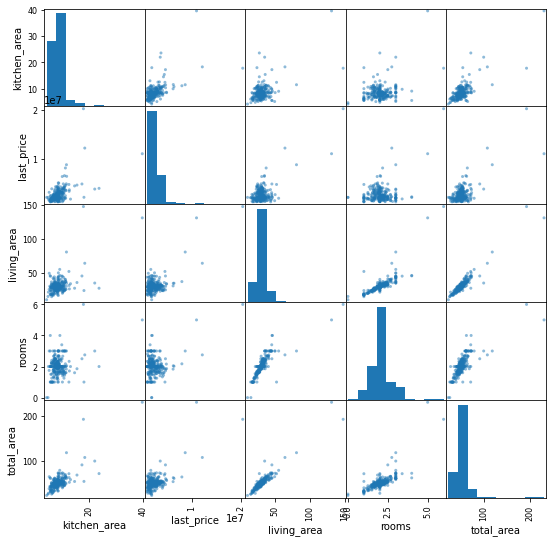

In [48]:
forsen2 = forsen.pivot_table(index='locality_name', values=['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms'])
display(forsen2)
pd.plotting.scatter_matrix(forsen2, figsize=(9,9))

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

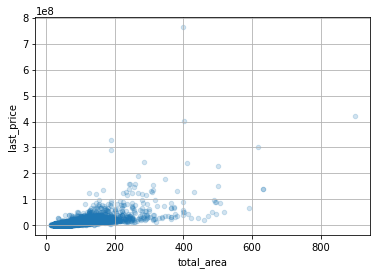

In [49]:
forsen.plot(x='total_area', y='last_price', kind='scatter', grid = True, alpha = 0.2)

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

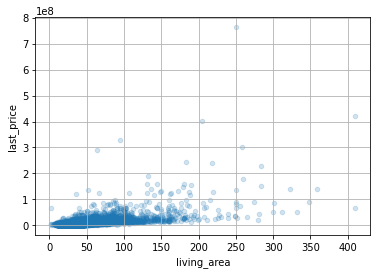

In [50]:
forsen.plot(x='living_area', y='last_price', kind='scatter', grid = True, alpha = 0.2)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

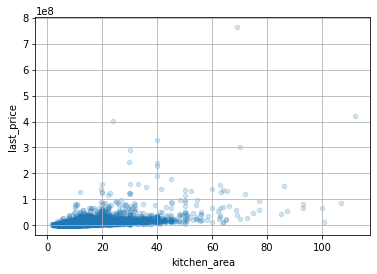

In [51]:
forsen.plot(x='kitchen_area', y='last_price', kind='scatter', grid = True, alpha = 0.2)

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

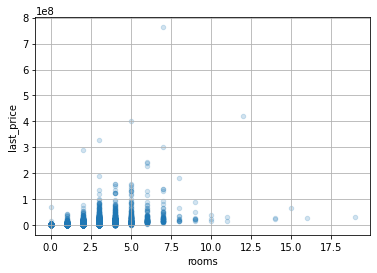

In [52]:
forsen.plot(x='rooms', y='last_price', kind='scatter', grid = True, alpha = 0.2)

<AxesSubplot:xlabel='floor_type'>

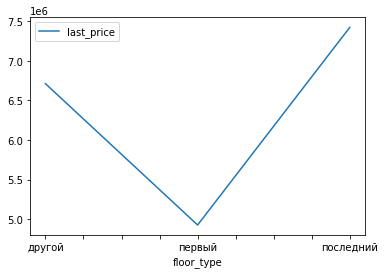

In [53]:
forsen_floor_type = forsen.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
forsen_floor_type.plot()

<AxesSubplot:xlabel='day_of_publishing'>

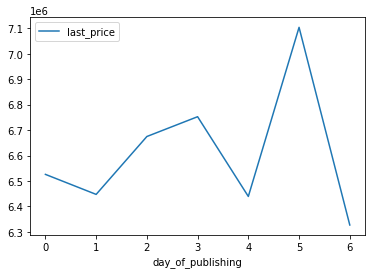

In [54]:
forsen_days_published = forsen.pivot_table(index='day_of_publishing', values='last_price', aggfunc='mean')
forsen_days_published.plot()

<AxesSubplot:xlabel='month_of_publishing'>

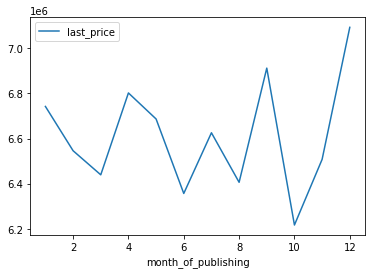

In [55]:
forsen_month_published = forsen.pivot_table(index='month_of_publishing', values='last_price', aggfunc='mean')
forsen_month_published.plot()

<AxesSubplot:xlabel='year_of_publishing'>

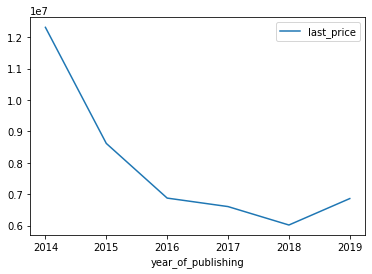

In [56]:
forsen_year_published = forsen.pivot_table(index='year_of_publishing', values='last_price', aggfunc='mean')
forsen_year_published.plot()

Чтобы ответить на вопрос какие факторы больше всего влияют на общую (полную) стоимость объекта, построим матрицу корреляции датасета. 
Нас интересует вторая строка last_price (цена). Коэффициент корреляции с общей площадью - 0.65, жилой площадью - 0.58, площадью кухни - 0.51, т.е. в целом при увеличении любой из трех площадей существенно увеличивается и цена.
Корреляция цены с кол-м комнат - 0.36, так что можно сказать, что с увеличением комнат также растет и цена на объект.
Что касается зависимости цены от расположения этажа (первый/последний/другой), то на первом этаже как правильно цены ниже, расположение на последнем является самым дорогим, на других этажах дороже, чем на первом и в среднем дешевле, чем на последнем.
Зависимость цены от дня публикации - самым "дешёвым" днем оказалось воскресенье, затем идут вторник и пятница, самые дорогие цены наблюдаются в субботу, после идут среда и четверг. В понедельник цена чуть выше вторника и пятницы.
По месяцам распределение следующее - самым "дешёвым" оказался октябрь. Следом чуть выше идут март, июнь и август. Самые высокие цены, как правило, в декабре. Чуть пониже в сентябре, апреле и январе. В феврале, мае, июле и ноябре цены средние.
В 2014 году цены были наиболее высокими из выборки, с каждым годом цены на недвижимость падали вплоть до 2018 года. С 2018 года тенденция сменилась на возрастающую. Тем не менее, самые дорогие объявления были опубликованы в 2017 и 2018 годах.

In [57]:
forsen_locality_name_avrg_price = forsen.groupby('locality_name')['one_square_price'].agg(['count', 'mean'])
display(forsen_locality_name_avrg_price.sort_values(by='count', ascending = False).head(10))


,count,mean
locality_name,,
Санкт-Петербург,15627,114692.459777
поселок Мурино,544,85502.782454
Кудрово,470,95369.531312
поселок Шушары,439,78673.295765
Всеволожск,392,68637.721337
Пушкин,369,103125.819291
Колпино,337,75480.547446
поселок Парголово,326,90135.075586
Гатчина,301,68828.249230


Выше мы посчитали среднюю цену квадратного метра для 10 наиболее распространенных населенных пунктов в объявлениях. Я использовал метод mean именно среднее, а не медианное, т.к. считаю, что в данном случае это правильнее для объективной оценки стоимости. Самая низкая стоимость м2 в Выборге - 58 667 руб., а самая высокая в Санкт-Петербурге - 114 669 руб.

,one_square_price
distance_to_centre_km,
0.0,237259.819916
1.0,176637.341782
2.0,157846.827267
3.0,120874.051978
4.0,133299.795169
5.0,140468.341676
6.0,149414.015238
7.0,156348.461854
8.0,124900.077302


<AxesSubplot:xlabel='distance_to_centre_km'>

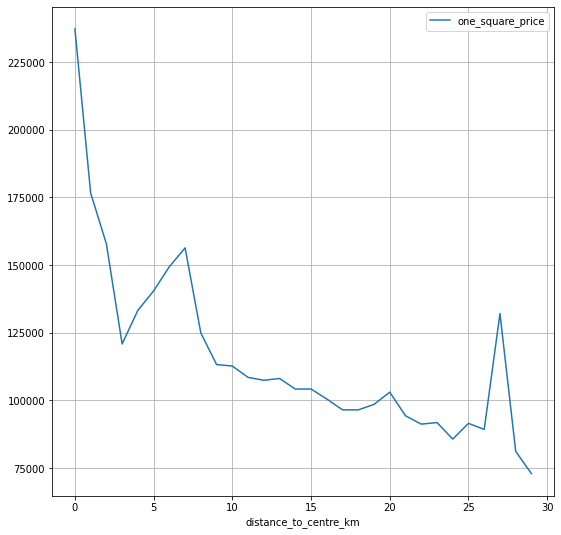

In [58]:
forsen_locality_name_avrg_price_km = forsen.query('locality_name == "Санкт-Петербург"')
forsen_locality_name_avrg_price_km = forsen_locality_name_avrg_price_km.pivot_table(
    index='distance_to_centre_km', values='one_square_price', aggfunc=('mean'))
display(forsen_locality_name_avrg_price_km)
forsen_locality_name_avrg_price_km.plot(kind='line', figsize=(9,9), grid = True)

Для наглядности мы построили график, на котором отчетливо видно, как с увеличением расстояния от объекта до центра города падает и цена. Самая большая средняя цена за м2 ожидаемо принадлежит объектам в центре города (0 км), самая низкая - 29 км. Виден отчетливый скачок на отметке в 27 км., но это вероятно из-за особенностей объявлений (более хороший ремонт, удобства и т.д.).

### Общий вывод

**Общий вывод исследования**  
Проведя исследование, мы выяснили, что:  
* В выборке наибольшее кол-во объявлений с общей площадью объекта около 50 квадратных метров
* Наибольшее кол-во объявлений с жилой площадью прим. 20 квадратных метров
* Наибольшее кол-во объявлений с площадью кухни прим. 10 квадратных метров
* Самый дорогой объект выборки – 76,3 млн. руб. Больше всего в выборке объявлений с прим. ценой объекта в 4 млн. руб.
* Больше всего объявлений с однокомнатными и двухкомнатными квартирами. Самое большое кол-во комнат в массиве данных – 19 шт.
* Самая частая высота потолков в объявлениях – около 2.5 м., почти 16 тыс. объявлений. 
* Основная масса объектов находится на 1-4м этажах - около 12 тыс. ед. (~2800 на 1-м, ~3200 на 2-м, ~3000 на 3-м, ~2700 на 4-м). ~2500 на 5 этаже, 1250 на 6-м, 1200 на 7-м, 1000 на 8-м, столько же на 9-м, около 650 на 10-м. Объектов начиная с 10 этажа и выше около 3500 ед.
* Самые распространенные квартиры в выборке находятся в пятиэтажных домах (около 6 тыс.)
* Больше всего объявлений с объектами, находящимися прим. на расстоянии от 11,5 до 15 км. до центра города
* Основная масса объектов находится на расстоянии от 10 км. до 30 км до аэропорта. На расстоянии до 10 км. объектов практически нет.
* Рядом с большинством объектов, скорее всего, нет парков, т.к. из почти 24-х тысяч данные по паркам были только в 8 тысячах, отсутствие данных скорее всего связано именно с этим. Из имеющихся данных же можно сделать вывод, что в среднем парк от квартиры находится на расстоянии в 500 м.

Все объявления были размещены равномерно в будние дни, почти в два раза реже размещение проходило в субботу/воскресенье. Наименьшее кол-во объявлений было размещено в мае, январе и декабре. Больше всего в феврале и марте, затем идут апрель и ноябрь. В каждый из летних месяцев размещений почти также мало как и в декабре.

Что касается времени, необходимого на продажу квартиры, то обычно продажа занимает около 100 дней (пик значений в ~3500 ед.). Затем около 9 тыс. объявлений были проданы в период от 1 дня до трех месяцев. Также, исходя из данных о нижнем (25%) и верхнем (75%) квартилях, быстрыми продажами можно считать те, которые были сделаны за ~45 дней, а долгими за ~232 дня.

Также мы выяснили, что на цену продажи объекта влияет множество факторов. К примеру, существует корреляция между площадью объекта и ценой: с увеличением общей площади объекта растет и цена, коэффициент корреляции равен 0.65; аналогично с жилой площадью и площадью кухни - 0.58 и 0.51 соответственно.
Корреляция цены с кол-м комнат - 0.36, так что можно сказать, что с увеличением комнат также растет и цена на объект. 

Зависимость цены от расположения этажа (первый/последний/другой) - на первом этаже как правильно цены ниже, расположение на последнем является самым дорогим, на других этажах дороже, чем на первом и в среднем дешевле, чем на последнем.

Зависимость цены от дня публикации - самым "дешёвым" днем оказалось воскресенье, затем идут вторник и пятница, самые дорогие цены наблюдаются в субботу, после идут среда и четверг. В понедельник цена чуть выше вторника и пятницы.
По месяцам распределение следующее - самым "дешёвым" оказался октябрь. Следом чуть выше идут март, июнь и август. Самые высокие цены, как правило, в декабре. Чуть пониже в сентябре, апреле и январе. В феврале, мае, июле и ноябре цены средние.

В 2014 году цены были наиболее высокими из выборки, с каждым годом цены на недвижимость падали вплоть до 2018 года. С 2018 года тенденция сменилась на возрастающую. Тем не менее, самые дорогие объявления были опубликованы в 2017 и 2018 годах.

Как уже было упомянуто, наиболее популярная локация для продажи - Санкт-Петербург. Самая высокая средняя цена за квадратный метр также в Питере – 114 669 руб.
Самая низкая стоимость м2 из топ-10 локаций по кол-ву объявлений -  в Выборге - 58 667 руб.

В завершении также можно упомянуть, что чем ближе к центру города находится объект, тем он дороже.
Ниже представлен график из исследования, для наглядности.

<AxesSubplot:xlabel='distance_to_centre_km'>

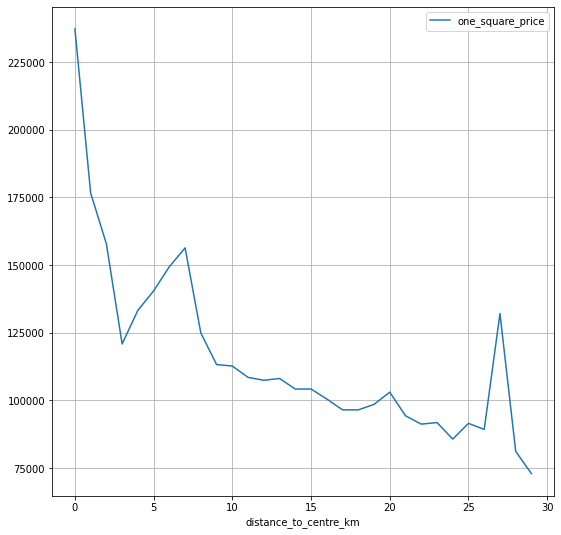

In [59]:
forsen_locality_name_avrg_price_km.plot(kind='line', figsize=(9,9), grid = True)

На графике отчетливо видно, как с увеличением расстояния от объекта до центра города падает и цена. Самая большая средняя цена за м2 ожидаемо принадлежит объектам в центре города (0 км), самая низкая - 29 км. Виден отчетливый скачок на отметке в 27 км., но это вероятно из-за особенностей объявлений (более хороший ремонт, удобства и т.д.).